In [124]:
%matplotlib inline
from one_share import *
from all_shares import *
from gain import *

### 输入股票代码

In [125]:
code = '600315'

In [126]:
stock_data = stock_data_reader(code)
if stock_data is None:
        print('%06s no enough data [1]' % code)
else:
    analysis_data = calculat_average(stock_data)
    strategy_data = average_strategy(analysis_data)
    if(strategy_data['前复权'].count() < 500):
        print('%06s no enough data [2]' % code)
    else:
        gain_result = get_all_gain(strategy_data)
        result = pd.DataFrame(index=["'" + code], columns=gen_index())
        result['name'][0] = stock_data['名称'][-1]
        fill_result_by_period(result, gain_result, strategy_data, '250d')
        fill_result_by_period(result, gain_result, strategy_data, '500d')
        fill_result_by_period(result, gain_result, strategy_data, 'all')

### 最新报价

In [127]:
print('%s\t%06s\t%6s\t%0.2f\t%0.3f\t%0.3f\t%s\t%s'
      % (stock_data.index[-1], code, stock_data['名称'][-1], stock_data['收盘价'][-1],
            result['avg-250d'][0], result['max-250d'][0],
            result['strategy-250d'][0], result['bs-250d'][0]))

2018-02-07	600315	  上海家化	32.46	1.096	1.218	wm	S


### 各种策略250d/500d/all收益分析

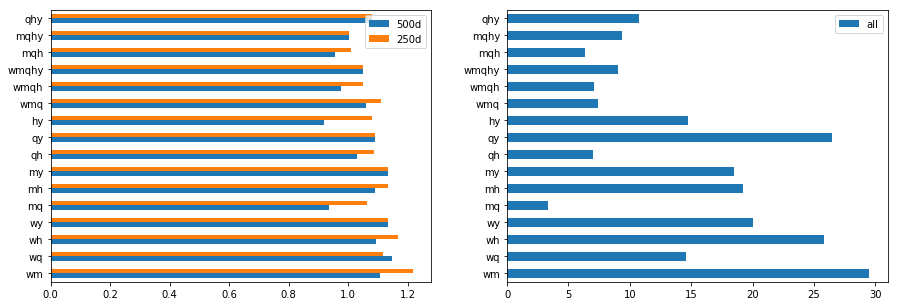

In [128]:
plt.figure(figsize=(15,5))
ax = plt.subplot(121)
gain_result[['500d', '250d']].plot(kind='barh', ax=ax)
ax = plt.subplot(122)
gain_result['all'].plot(kind='barh', ax=ax, legend=True)

### 各种策略250d/500d/all持仓时间比

In [129]:
pos_days = pd.DataFrame(index=avg_strategys, columns=['B', 'S'])

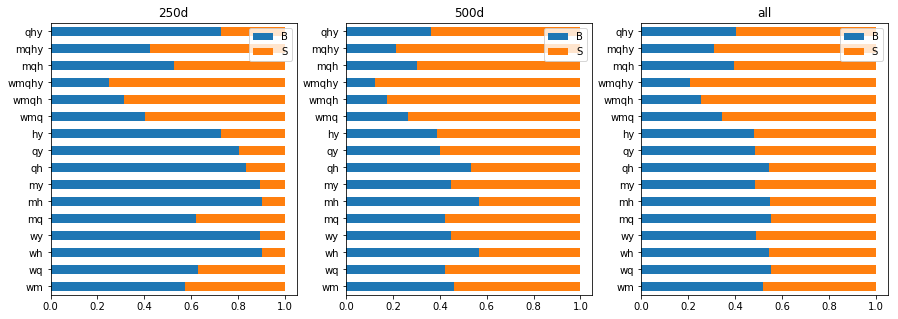

In [130]:
fig, ax = plt.subplots(1, 3)
get_position_days(strategy_data, 250).plot(kind='barh', ax=ax[0], title='250d', stacked=True, figsize=(15,5))
get_position_days(strategy_data, 500).plot(kind='barh', ax=ax[1], title='500d', stacked=True)
get_position_days(strategy_data, 0).plot(kind='barh', ax=ax[2], title='all', stacked=True)

### 月走势

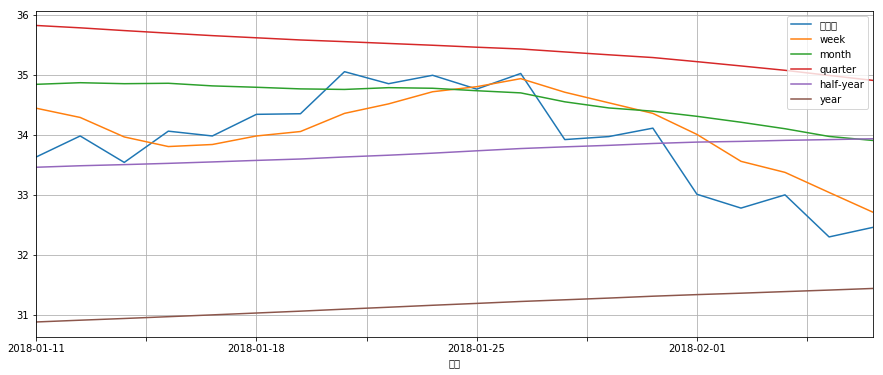

In [131]:
analysis_data[['前复权', 'week', 'month', 'quarter', 'half-year', 'year']][-20:].plot(figsize=(15,6), grid=True)

### 季度走势

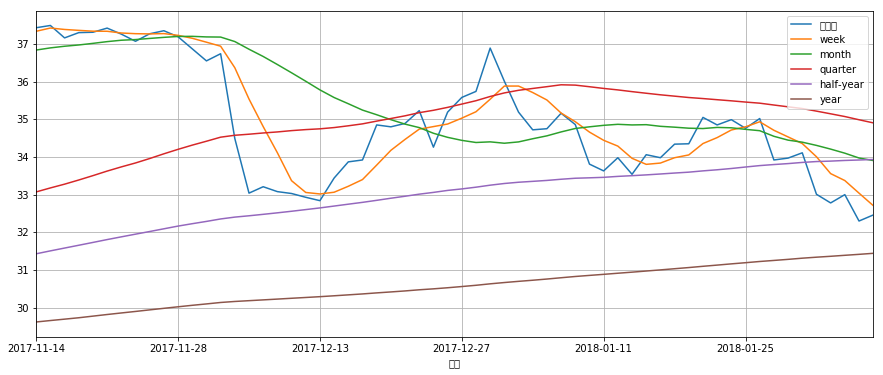

In [132]:
analysis_data[['前复权', 'week', 'month', 'quarter', 'half-year', 'year']][-60:].plot(figsize=(15,6), grid=True)

### 半年走势

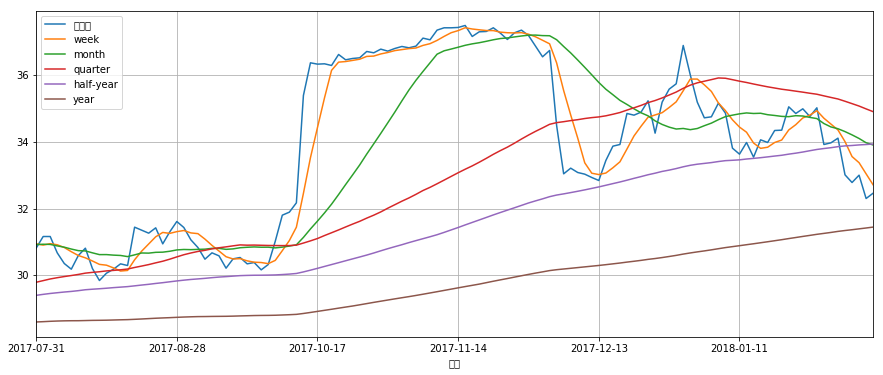

In [133]:
analysis_data[['前复权', 'week', 'month', 'quarter', 'half-year', 'year']][-120:].plot(figsize=(15,6), grid=True)

## 年走势

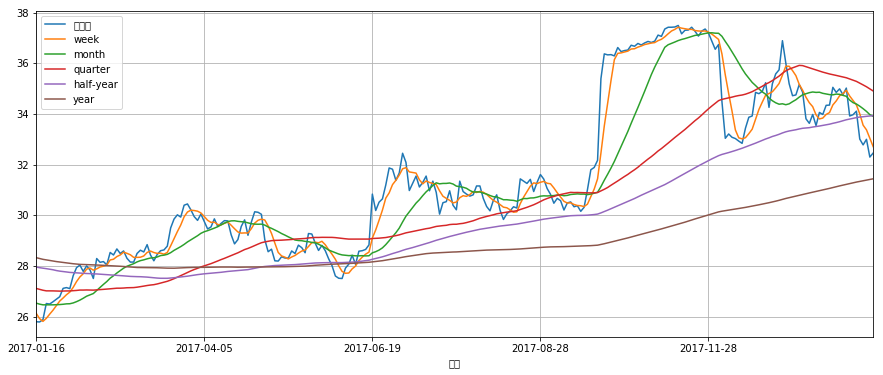

In [134]:
analysis_data[['前复权', 'week', 'month', 'quarter', 'half-year', 'year']][-250:].plot(figsize=(15,6), grid=True)

### 历史走势

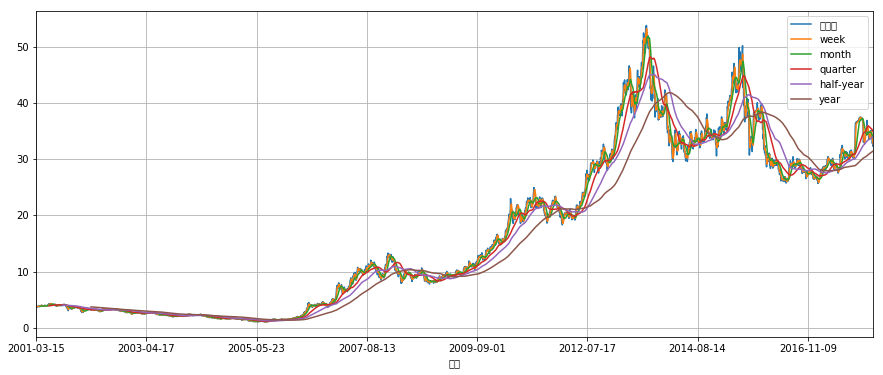

In [135]:
analysis_data[['前复权', 'week', 'month', 'quarter', 'half-year', 'year']].plot(figsize=(15,6), grid=True)